In [4]:
import re
import os
import glob
import sys
import time
import pandas as pd
import matplotlib as mpl
from matplotlib import rcParams
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as path_effects
import seaborn as sns
from sklearn.preprocessing import StandardScaler

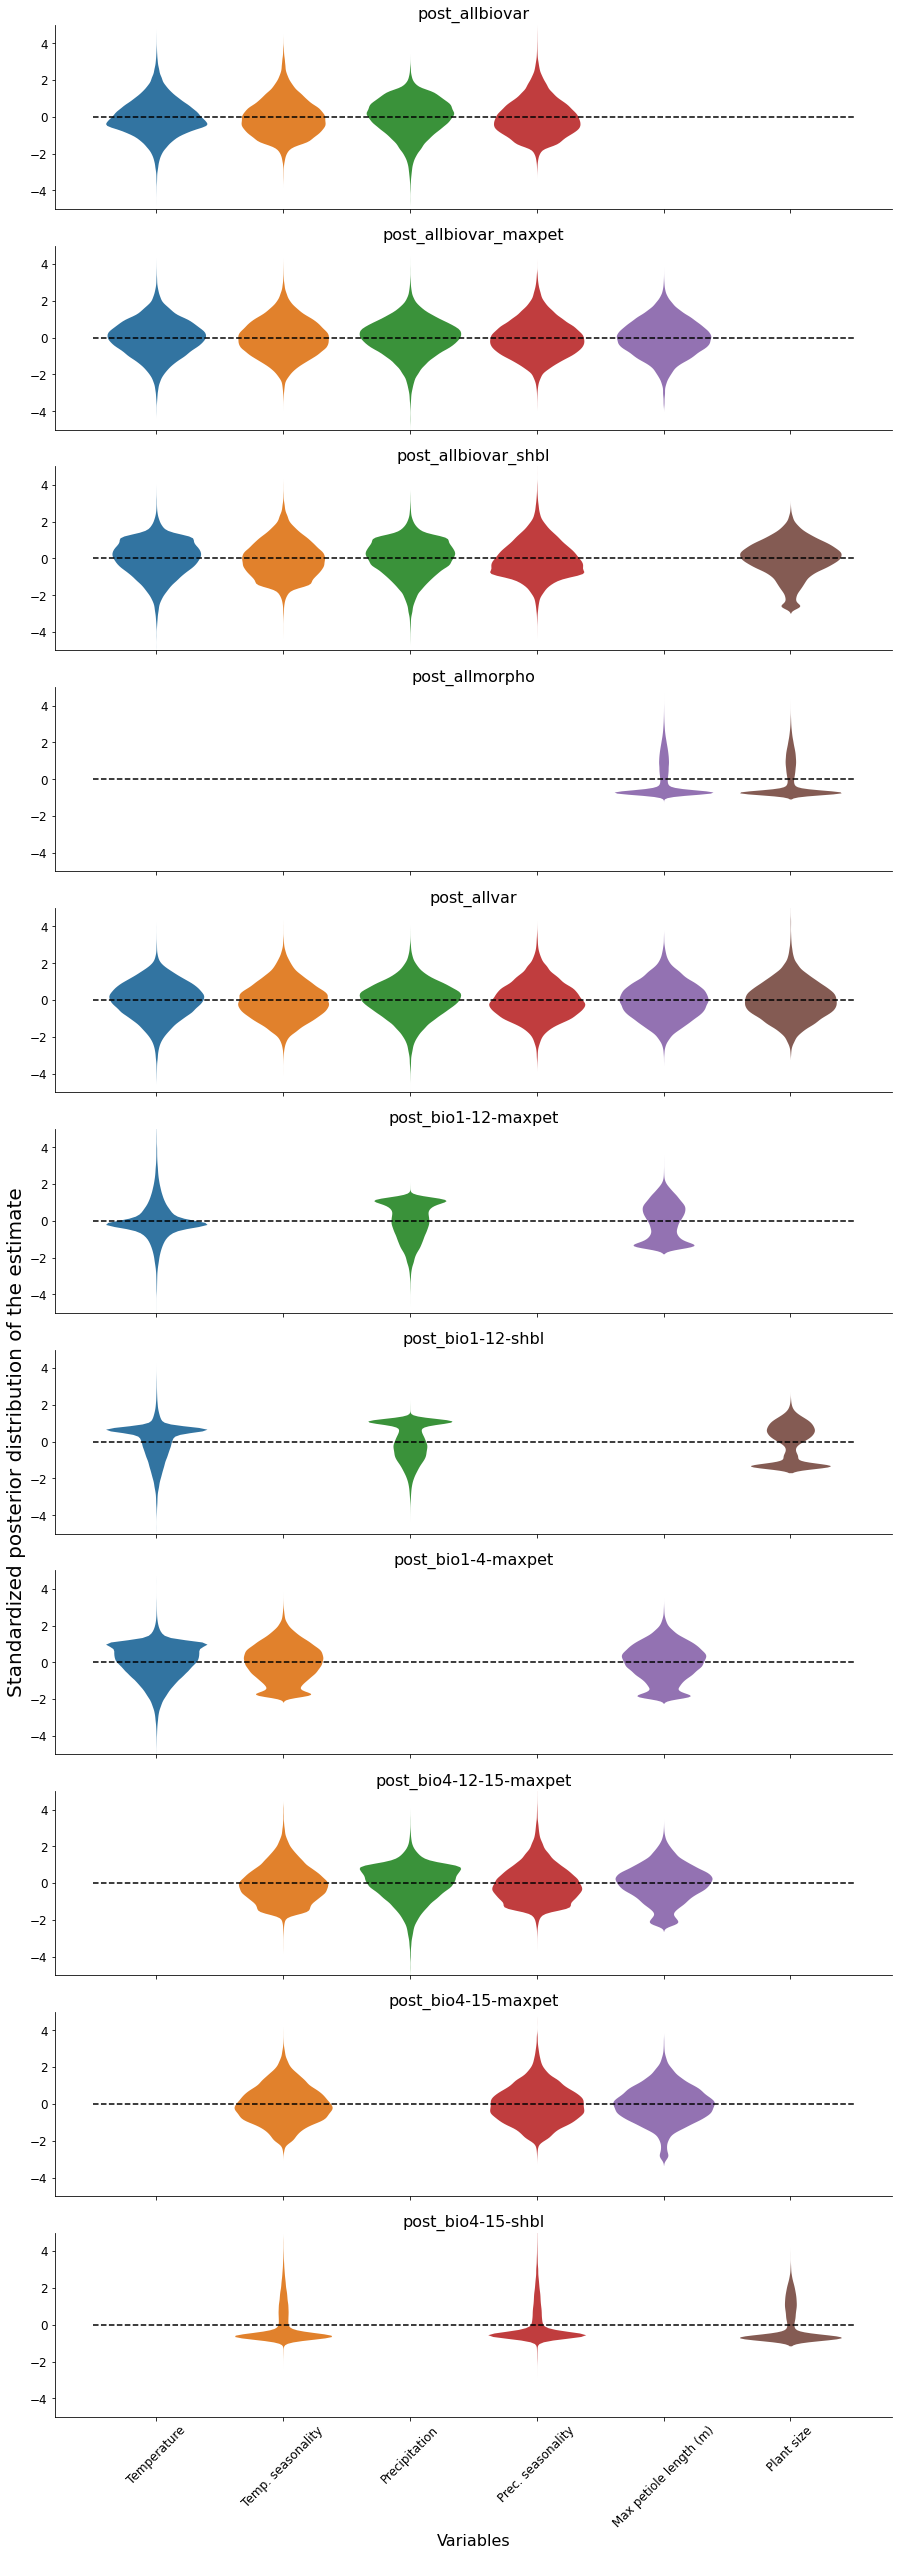

In [5]:
xtixklabel_dict={'bio1':'Temperature','bio4':'Temp. seasonality','bio12':'Precipitation','bio15':'Prec. seasonality',
               'maxpet':'Max petiole length (m)','shbl':'Plant size'}

path='../'
filePref='Post_*'

test_files=11

fig=plt.figure(figsize=(15,(4*test_files)),facecolor='w')
G = gridspec.GridSpec(test_files,1,hspace=0.2)

xx=0

for filename in glob.glob(os.path.join(path,'%s'%(filePref))):
    tempmatch=re.search('.+(post_.+)_[0-9]+.csv',filename)
    test=tempmatch.group(1) if tempmatch else ''
    post_results=pd.read_csv(filename)
    post_results.drop(columns=['Unnamed: 0'],inplace=True)
#     print('File: %s'%(filename))
#     print(post_results.describe())
    scaler=StandardScaler()
    scaled=StandardScaler().fit_transform(post_results.values)
    post_results_scaled=pd.DataFrame(scaled, index=post_results.index, columns=post_results.columns)
#     print(post_results_scaled.describe()) ## means of the posteriors after stdizing
    var_names=post_results_scaled.columns
    post_scaled_melted=pd.melt(post_results_scaled,value_name='variables',value_vars=var_names,var_name='stand_post') # ['bio1','bio4','bio12','bio15','maxpet','shbl']

    ax=plt.subplot(G[xx,0])
    sns.violinplot(x=post_scaled_melted['stand_post'],y=post_scaled_melted['variables'],ax=ax,linewidth=0,order=('bio1','bio4','bio12','bio15','maxpet','shbl'))
    #     ax.set(xlabel='Variables',ylabel='Standardized poserior distribution of the estimate',title=test)
    # ax.set_title(test_dict[test],fontsize=20)
    ax.hlines(0,-0.5,5.5,colors='k',linestyles='--')
    
    if xx < test_files-1:
        ax.set_xticklabels('')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        ax.set_ylabel('')
        ax.set_xlabel('Variables',fontsize=16)
        ax.set_xticklabels(xtixklabel_dict.values())
        plt.xticks(rotation=45, ha='center', fontsize=12)
        
    plt.yticks(fontsize=12)
    if xx == round(test_files/2):
        ax.set_ylabel('Standardized posterior distribution of the estimate',fontsize=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(test,fontsize=16)
    plt.ylim(-5, 5)
    xx+=1
plt.show()
